In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir("C:/Nakul/UCLA Coursework/ML_Project")
business_df = pd.read_json('yelp_academic_dataset_business.json',lines=True)
business_df.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV


In [2]:
#Reading Dataset
business_df = pd.read_json('yelp_academic_dataset_business.json',lines=True)
business_df.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV


In [3]:
business_df = business_df.dropna()

business_df['review_count']=business_df['review_count'].fillna(0)
business_df['stars']=business_df['stars'].fillna(0)

business_df.describe()
#business_df.groupby('stars').sum()
#business_df.groupby('stars').count().name
stars = business_df.groupby('stars').mean()
stars.corr()

business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127442 entries, 0 to 188592
Data columns (total 15 columns):
address         127442 non-null object
attributes      127442 non-null object
business_id     127442 non-null object
categories      127442 non-null object
city            127442 non-null object
hours           127442 non-null object
is_open         127442 non-null int64
latitude        127442 non-null float64
longitude       127442 non-null float64
name            127442 non-null object
neighborhood    127442 non-null object
postal_code     127442 non-null object
review_count    127442 non-null int64
stars           127442 non-null float64
state           127442 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 15.6+ MB


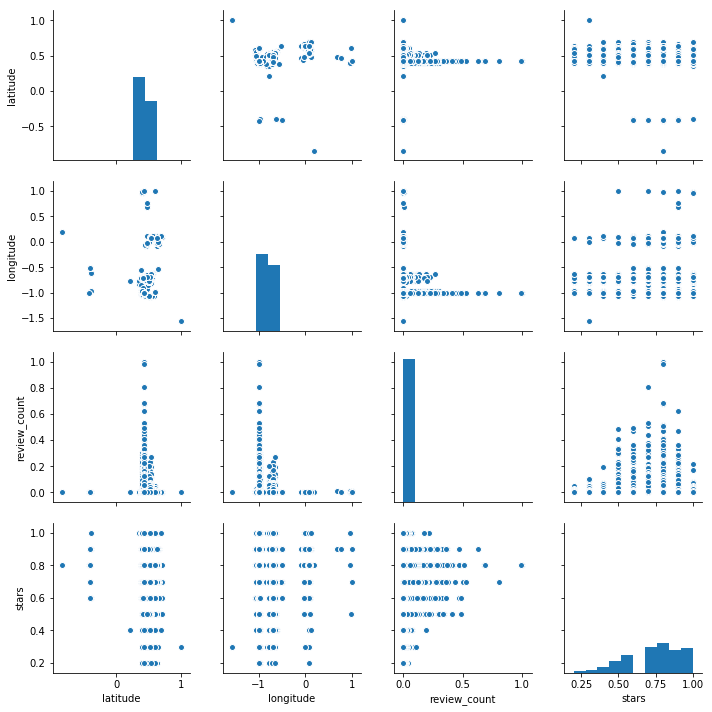

C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


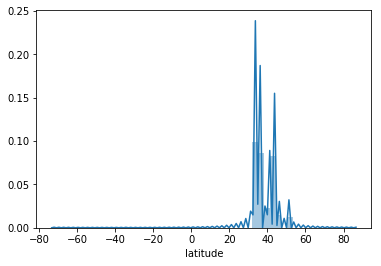

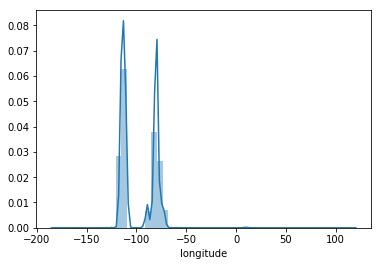

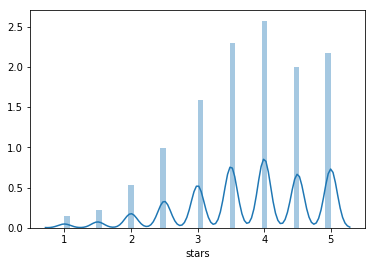

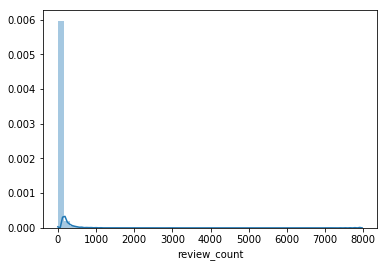

4.0    26230
3.5    23367
5.0    22177
4.5    20339
3.0    16157
2.5    10125
2.0     5386
1.5     2227
1.0     1434
Name: stars, dtype: int64

In [4]:
numeric_features = business_df.loc[:, ['latitude', 'longitude', 'review_count', 'stars']]
numeric_features_standardized = (numeric_features)/numeric_features.max()
ax = sns.pairplot(numeric_features_standardized)
plt.show()

ax = sns.distplot(business_df['latitude'])
plt.show()
ax = sns.distplot(business_df['longitude'])
plt.show()
ax = sns.distplot(business_df['stars'])
plt.show()
ax = sns.distplot(business_df['review_count'])
plt.show()
business_df["stars"].value_counts()

In [5]:
business_df = business_df.rename(columns={'id': 'business_id'})
from pandas.io.json import json_normalize #package for flattening json in pandas df

with open('yelp_academic_dataset_checkin.json', 'rb') as f:
    data = f.readlines()

data1 = [item.rstrip() for item in data]
data_json_str = b"[" + b','.join(data1) + b"]"

data_df = pd.read_json(data_json_str)
print (data_df["time"].head(2))    

0    {'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ...
1    {'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1...
Name: time, dtype: object


In [6]:
temp = []
i = 0
for i in range(len(data_df["time"])):
    count = 0
    count=sum(data_df["time"][i].values())
    temp.append(count)
    
data_df["checkin_count"] = temp

print (data_df["checkin_count"].unique())
data_df.info()

[ 151    7    6 ... 1648 1618 5569]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157075 entries, 0 to 157074
Data columns (total 3 columns):
business_id      157075 non-null object
time             157075 non-null object
checkin_count    157075 non-null int64
dtypes: int64(1), object(2)
memory usage: 3.6+ MB


In [7]:
df_merged = business_df.merge(data_df, on=('business_id'), suffixes=('_l', '_r'))
df_merged.info()
df_merged.head(2)
#df_merged.column.names()
list(df_merged.columns.values)

new_df = df_merged[['business_id','review_count', 'stars', 'checkin_count', 'city', 'state', 'neighborhood', 'categories']]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110403 entries, 0 to 110402
Data columns (total 17 columns):
address          110403 non-null object
attributes       110403 non-null object
business_id      110403 non-null object
categories       110403 non-null object
city             110403 non-null object
hours            110403 non-null object
is_open          110403 non-null int64
latitude         110403 non-null float64
longitude        110403 non-null float64
name             110403 non-null object
neighborhood     110403 non-null object
postal_code      110403 non-null object
review_count     110403 non-null int64
stars            110403 non-null float64
state            110403 non-null object
time             110403 non-null object
checkin_count    110403 non-null int64
dtypes: float64(3), int64(3), object(11)
memory usage: 15.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110403 entries, 0 to 110402
Data columns (total 8 columns):
business_id      110403 non-null ob

In [8]:
# Transform non-numeric data for machine learning
new_df.stars = new_df.stars.round()

new_df["stars"].value_counts()
new_df['review_count']=new_df['review_count'].fillna(0)

cols_to_norm = ['review_count', 'checkin_count']
new_df[cols_to_norm] = new_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
new_df['state'] = label_encoder.fit_transform(new_df['state'])

label_encoder = preprocessing.LabelEncoder()
new_df['city'] = label_encoder.fit_transform(new_df['city'])

label_encoder = preprocessing.LabelEncoder()
new_df['neighborhood'] = label_encoder.fit_transform(new_df['neighborhood'])

new_df.drop(['neighborhood'], axis=1, inplace=True)
new_df.head(5)

C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,business_id,review_count,stars,checkin_count,city,state,categories
0,Apn5Q_b6Nz61Tq4XzPdf9A,0.002637,4.0,0.000202,95,2,"Tours, Breweries, Pizza, Restaurants, Food, Ho..."
1,AjEbIBw6ZFfln7ePHha9PA,0.000000,4.0,0.000000,250,27,"Chicken Wings, Burgers, Caterers, Street Vendo..."
2,O8S5hYJ1SMc8fA4QBtVujA,0.000251,4.0,0.000043,426,36,"Breakfast & Brunch, Restaurants, French, Sandw..."
3,8USyCYqpScwiNEb58Bt6CA,0.000126,2.0,0.000007,95,2,"Home & Garden, Nurseries & Gardening, Shopping..."
4,45bWSZtniwPRiqlivpS8Og,0.007533,4.0,0.005662,539,6,"Coffee & Tea, Food"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110403 entries, 0 to 110402
Data columns (total 4 columns):
review_count     110403 non-null float64
checkin_count    110403 non-null float64
city             110403 non-null int64
state            110403 non-null int64
dtypes: float64(2), int64(2)
memory usage: 4.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110403 entries, 0 to 110402
Data columns (total 1 columns):
stars    110403 non-null float64
dtypes: float64(1)
memory usage: 1.7 MB


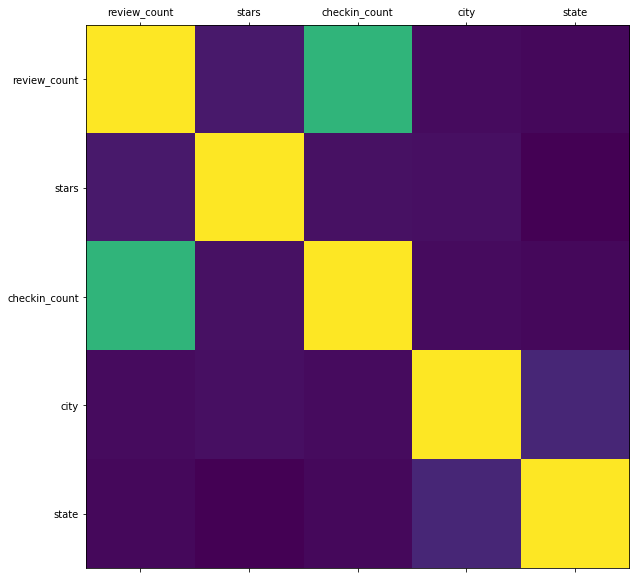

In [9]:
X = new_df[['review_count', 'checkin_count', 'city', 'state']]
y = new_df[['stars']]

X.info()
y.info()

corr = new_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

plt.show()


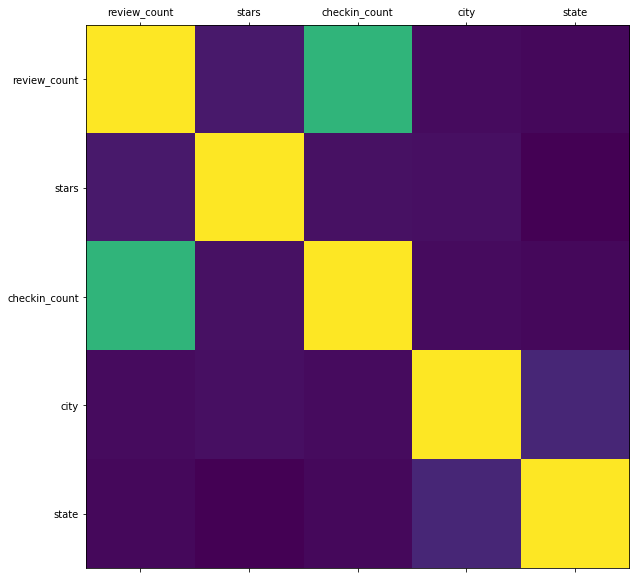

In [10]:
from sklearn.preprocessing import StandardScaler

# Normalizing it-  X-mu/stdev.p
scaler = StandardScaler()
#X.head(3)
#scaler.fit_transform(X.head(3))
X = scaler.fit_transform(X)

corr = new_df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
   
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.69473135096687


In [15]:
#Filter the restaurants from this data set
temp = []
i = 0
for category in new_df["categories"]:
    if 'Restaurants' in category:
        temp.append(i)
    i += 1
        
#print (temp)

rest_df = new_df.iloc[temp]
rest_df.info()
rest_df.to_csv('restaurants_data', sep='\t')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41944 entries, 0 to 110393
Data columns (total 7 columns):
business_id      41944 non-null object
review_count     41944 non-null float64
stars            41944 non-null float64
checkin_count    41944 non-null float64
city             41944 non-null int64
state            41944 non-null int64
categories       41944 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 2.6+ MB
